In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 635 kB/s 


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings, random
warnings.filterwarnings(action='ignore')

from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from category_encoders.ordinal import OrdinalEncoder
from sklearn.model_selection import StratifiedKFold

from sklearn.cluster import KMeans
from catboost import CatBoostClassifier, Pool

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data = pd.read_csv('drive/MyDrive/Face_Emotion_Detection.csv')

data.head()

,new_label,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V1287,V1288,V1289,V1290,V1291,V1292,V1293,V1294,V1295,V1296
0,0,160,179,197,163,132,138,140,154,152,...,137,146,171,156,141,124,115,110,128,88
1,3,4,0,2,6,41,57,83,94,113,...,154,112,22,4,0,22,36,29,33,32
2,1,92,73,94,74,70,50,78,94,72,...,196,179,199,207,204,198,208,208,197,195
3,1,65,67,137,175,185,176,196,204,217,...,179,96,42,70,105,142,125,99,92,89
4,0,9,19,29,36,78,99,109,113,120,...,153,130,118,102,84,104,98,131,145,174


In [ ]:
data.shape

(9464, 1297)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data['new_label'], test_size=0.2, random_state=111, stratify=data['new_label'])

In [ ]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#모델링
def modeling(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    metrics(y_test,pred)
    return pred, model

#평가 지표
def metrics(y_test,pred):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred, average='macro')
    recall = recall_score(y_test,pred, average='macro')
    f1 = f1_score(y_test,pred, average='macro')
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy,precision,recall))
    print('f1-score : {0:.4f}'.format(f1))

In [ ]:
import itertools

def confusionMatrix(modelInput, feature, label, classes=['angry', 'happy', 'sad', 'neutral']):
    pred = modelInput.predict(feature)
    cm2 = confusion_matrix(pred, y_test)
    cm = confusion_matrix(pred, y_test, normalize = 'true')
    plt.figure(figsize=(5,5))
    plt.imshow(cm, cmap='Blues')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(i, j, '{}\n({}%)'.format(cm2[j, i], round(cm[j, i]*100, 1)),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('y_pred')
    plt.xlabel('y')
    plt.title('Confusion Matrix')

#1. Baseline

In [ ]:
from catboost import CatBoostClassifier, Pool

model = CatBoostClassifier()

model.fit(X_train, y_train)
pred = model.predict(X_test)

Learning rate set to 0.087732
0:	learn: 1.3508595	total: 2.73s	remaining: 45m 32s
1:	learn: 1.3194968	total: 3.94s	remaining: 32m 43s
2:	learn: 1.2959105	total: 5.22s	remaining: 28m 54s
3:	learn: 1.2758653	total: 6.39s	remaining: 26m 32s
4:	learn: 1.2574562	total: 7.65s	remaining: 25m 22s
5:	learn: 1.2414099	total: 8.91s	remaining: 24m 36s
6:	learn: 1.2270494	total: 10.2s	remaining: 24m 4s
7:	learn: 1.2128388	total: 11.5s	remaining: 23m 39s
8:	learn: 1.1992546	total: 12.7s	remaining: 23m 22s
9:	learn: 1.1877805	total: 14s	remaining: 23m 6s
10:	learn: 1.1772442	total: 15.4s	remaining: 23m 2s
11:	learn: 1.1684862	total: 16.5s	remaining: 22m 41s
12:	learn: 1.1586135	total: 17.7s	remaining: 22m 26s
13:	learn: 1.1498655	total: 19s	remaining: 22m 15s
14:	learn: 1.1419359	total: 20.2s	remaining: 22m 5s
15:	learn: 1.1343564	total: 21.5s	remaining: 22m 3s
16:	learn: 1.1277250	total: 22.8s	remaining: 21m 58s
17:	learn: 1.1200018	total: 24s	remaining: 21m 51s
18:	learn: 1.1136000	total: 25.2s	rem


Classification Report
              precision    recall  f1-score   support

       Angry       0.54      0.30      0.38       290
       Happy       0.74      0.88      0.80       820
         Sad       0.51      0.19      0.28       276
     Neutral       0.57      0.74      0.64       507

    accuracy                           0.65      1893
   macro avg       0.59      0.52      0.53      1893
weighted avg       0.63      0.65      0.62      1893



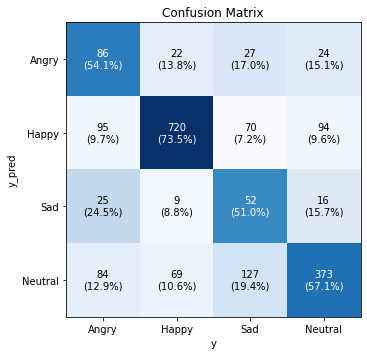

In [ ]:
label = ['Angry', 'Happy', 'Sad', 'Neutral']
confusionMatrix(model, X_test, y_test, classes=label)

from sklearn.metrics import classification_report
print('\nClassification Report')
print(classification_report(y_test, pred, target_names=label))

In [ ]:
metrics(y_test, pred)

정확도 : 0.6503, 정밀도 : 0.5893, 재현율 : 0.5247
f1-score : 0.5254


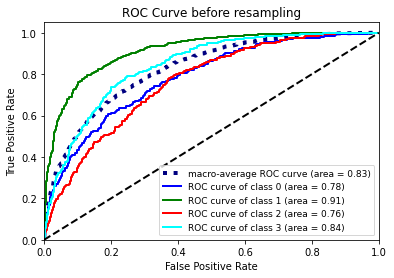

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.metrics import roc_auc_score

y = np.array(label_binarize(y_test, classes=[0, 1, 2, 3]))
score = np.array(model.predict(X_test, prediction_type='Probability'))
n_classes = y.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["blue", "green", "red", "aqua"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve before resampling")
plt.legend(loc="lower right", fontsize = 9)
plt.show()


#2. SMOTE 적용

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_over,y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)

print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (7571, 1296) (7571,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (13120, 1296) (13120,)
SMOTE 적용 후 레이블 값 분포: 
 1    3280
2    3280
3    3280
0    3280
Name: new_label, dtype: int64


In [ ]:
model_smote = CatBoostClassifier()

model_smote.fit(X_train_over , y_train_over)
pred_smote = model_smote.predict(X_test)

Learning rate set to 0.090227
0:	learn: 1.3696678	total: 1.79s	remaining: 29m 45s
1:	learn: 1.3551435	total: 3.1s	remaining: 25m 48s
2:	learn: 1.3398461	total: 4.44s	remaining: 24m 36s
3:	learn: 1.3284350	total: 5.95s	remaining: 24m 41s
4:	learn: 1.3181787	total: 7.38s	remaining: 24m 28s
5:	learn: 1.3066355	total: 8.7s	remaining: 24m 1s
6:	learn: 1.2973314	total: 10.1s	remaining: 23m 45s
7:	learn: 1.2864607	total: 11.4s	remaining: 23m 30s
8:	learn: 1.2768878	total: 12.6s	remaining: 23m 11s
9:	learn: 1.2679335	total: 14s	remaining: 23m 9s
10:	learn: 1.2603580	total: 15.5s	remaining: 23m 9s
11:	learn: 1.2523523	total: 16.8s	remaining: 23m 5s
12:	learn: 1.2437149	total: 18.3s	remaining: 23m 9s
13:	learn: 1.2360895	total: 19.7s	remaining: 23m 6s
14:	learn: 1.2284329	total: 21s	remaining: 23m 1s
15:	learn: 1.2211781	total: 22.4s	remaining: 22m 55s
16:	learn: 1.2145327	total: 23.7s	remaining: 22m 49s
17:	learn: 1.2079471	total: 25.1s	remaining: 22m 47s
18:	learn: 1.2018933	total: 26.4s	remai


Classification Report
              precision    recall  f1-score   support

       Angry       0.44      0.35      0.39       290
       Happy       0.77      0.84      0.80       820
         Sad       0.33      0.26      0.29       276
     Neutral       0.57      0.62      0.59       507

    accuracy                           0.62      1893
   macro avg       0.53      0.52      0.52      1893
weighted avg       0.60      0.62      0.61      1893



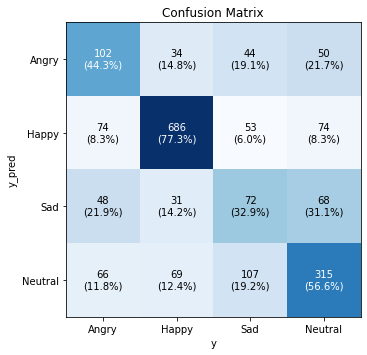

In [ ]:
confusionMatrix(model_smote, X_test, y_test, classes=label)

print('\nClassification Report')
print(classification_report(y_test, pred_smote, target_names=label))

In [ ]:
metrics(y_test, pred_smote)

정확도 : 0.6207, 정밀도 : 0.5278, 재현율 : 0.5176
f1-score : 0.5198


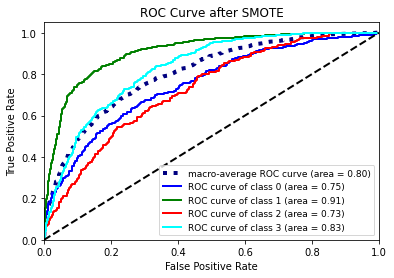

In [ ]:
y = np.array(label_binarize(y_test, classes=[0, 1, 2, 3]))
score = np.array(model_smote.predict(X_test, prediction_type='Probability'))
n_classes = y.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["blue", "green", "red", "aqua"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve after SMOTE")
plt.legend(loc="lower right", fontsize = 9)
plt.show()

# 3. ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=42)
X_train_over,y_train_over = ada.fit_resample(X_train, y_train)
print('ADASYN 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('ADASYN 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)

print('ADASYN 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

ADASYN 적용 전 학습용 피처/레이블 데이터 세트:  (7571, 1296) (7571,)
ADASYN 적용 후 학습용 피처/레이블 데이터 세트:  (12699, 1296) (12699,)
ADASYN 적용 후 레이블 값 분포: 
 1    3280
3    3279
0    3152
2    2988
Name: new_label, dtype: int64


In [ ]:
model_adasyn = CatBoostClassifier()

model_adasyn.fit(X_train_over , y_train_over)
pred_adasyn = model_adasyn.predict(X_test)

Learning rate set to 0.090077
0:	learn: 1.3693162	total: 1.87s	remaining: 31m 9s
1:	learn: 1.3542683	total: 4.01s	remaining: 33m 22s
2:	learn: 1.3414951	total: 6.41s	remaining: 35m 31s
3:	learn: 1.3306092	total: 7.93s	remaining: 32m 53s
4:	learn: 1.3200000	total: 9.26s	remaining: 30m 42s
5:	learn: 1.3090653	total: 10.5s	remaining: 29m 4s
6:	learn: 1.3008894	total: 11.8s	remaining: 27m 46s
7:	learn: 1.2916342	total: 13s	remaining: 26m 51s
8:	learn: 1.2832715	total: 14.3s	remaining: 26m 10s
9:	learn: 1.2733704	total: 15.7s	remaining: 25m 50s
10:	learn: 1.2656025	total: 17s	remaining: 25m 27s
11:	learn: 1.2584760	total: 18.3s	remaining: 25m 6s
12:	learn: 1.2518643	total: 19.6s	remaining: 24m 49s
13:	learn: 1.2453017	total: 20.9s	remaining: 24m 33s
14:	learn: 1.2386537	total: 22.3s	remaining: 24m 23s
15:	learn: 1.2324299	total: 23.7s	remaining: 24m 15s
16:	learn: 1.2259692	total: 25s	remaining: 24m 5s
17:	learn: 1.2189178	total: 26.4s	remaining: 24m 2s
18:	learn: 1.2141817	total: 27.7s	rem


Classification Report
              precision    recall  f1-score   support

       Angry       0.46      0.36      0.40       290
       Happy       0.79      0.84      0.82       820
         Sad       0.36      0.28      0.32       276
     Neutral       0.57      0.65      0.61       507

    accuracy                           0.63      1893
   macro avg       0.55      0.53      0.54      1893
weighted avg       0.62      0.63      0.62      1893



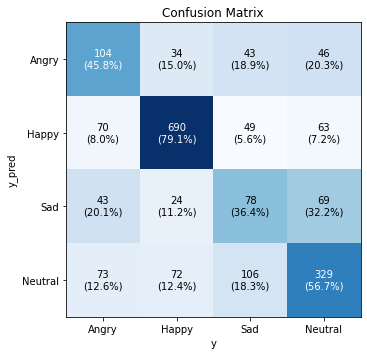

In [ ]:
confusionMatrix(model_adasyn, X_test, y_test, classes=label)

print('\nClassification Report')
print(classification_report(y_test, pred_adasyn, target_names=label))

In [ ]:
metrics(y_test, pred_adasyn)

정확도 : 0.6344, 정밀도 : 0.5453, 재현율 : 0.5329
f1-score : 0.5354


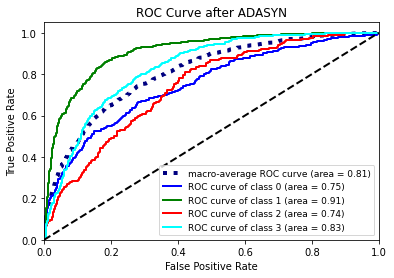

In [ ]:
y = np.array(label_binarize(y_test, classes=[0, 1, 2, 3]))
score = np.array(model_adasyn.predict(X_test, prediction_type='Probability'))
n_classes = y.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["blue", "green", "red", "aqua"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve after ADASYN")
plt.legend(loc="lower right", fontsize = 9)
plt.show()


#4.SMOTE + Tomek_link

In [ ]:
X_train_tomek = np.load('smote_tomek_train_x.npy').reshape(-1, 1296)
y_train_tomek = np.load('smote_tomek_train_y.npy')
X_test =  np.load('smote_tomek_test_x.npy').reshape(-1, 1296)
y_test = np.load('smote_tomek_test_y.npy').reshape(-1)

In [ ]:
X_test.shape

(1893, 1296)

In [ ]:
y_test.shape

(1893,)

In [ ]:
y_train_tomek.shape

(10294,)

In [ ]:
X_train_tomek.shape

(10294, 1296)

In [ ]:
model_tomek = CatBoostClassifier()

model_tomek.fit(X_train_tomek , y_train_tomek)
pred_tomek = model_tomek.predict(X_test)

Learning rate set to 0.089118
0:	learn: 1.3656838	total: 1.74s	remaining: 29m 2s
1:	learn: 1.3474497	total: 3.14s	remaining: 26m 6s
2:	learn: 1.3350001	total: 4.37s	remaining: 24m 13s
3:	learn: 1.3225120	total: 5.6s	remaining: 23m 15s
4:	learn: 1.3099733	total: 6.95s	remaining: 23m 2s
5:	learn: 1.2980600	total: 8.19s	remaining: 22m 36s
6:	learn: 1.2879851	total: 9.43s	remaining: 22m 18s
7:	learn: 1.2763082	total: 10.8s	remaining: 22m 13s
8:	learn: 1.2652712	total: 12.1s	remaining: 22m 7s
9:	learn: 1.2553068	total: 13.4s	remaining: 22m 8s
10:	learn: 1.2470233	total: 14.7s	remaining: 22m 3s
11:	learn: 1.2387873	total: 16s	remaining: 21m 57s
12:	learn: 1.2311653	total: 17.3s	remaining: 21m 57s
13:	learn: 1.2237409	total: 18.6s	remaining: 21m 50s
14:	learn: 1.2160366	total: 19.8s	remaining: 21m 42s
15:	learn: 1.2083424	total: 21.1s	remaining: 21m 36s
16:	learn: 1.2031296	total: 22.3s	remaining: 21m 29s
17:	learn: 1.1960754	total: 23.6s	remaining: 21m 24s
18:	learn: 1.1900434	total: 24.8s	r


Classification Report
              precision    recall  f1-score   support

       Angry       0.47      0.35      0.40       290
       Happy       0.77      0.85      0.81       820
         Sad       0.34      0.25      0.29       276
     Neutral       0.57      0.64      0.60       507

    accuracy                           0.63      1893
   macro avg       0.54      0.52      0.53      1893
weighted avg       0.61      0.63      0.61      1893



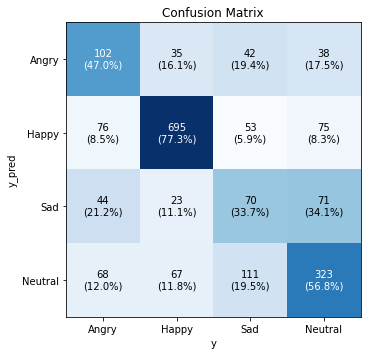

In [ ]:
confusionMatrix(model_tomek, X_test, y_test, classes=label)

print('\nClassification Report')
print(classification_report(y_test, pred_tomek, target_names=label))

In [ ]:
metrics(y_test, pred_tomek)

정확도 : 0.6286, 정밀도 : 0.5368, 재현율 : 0.5225
f1-score : 0.5252


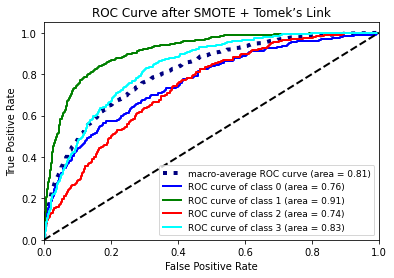

In [ ]:
y = np.array(label_binarize(y_test, classes=[0, 1, 2, 3]))
score = np.array(model_tomek.predict(X_test, prediction_type='Probability'))
n_classes = y.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["blue", "green", "red", "aqua"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve after SMOTE + Tomek’s Link")
plt.legend(loc="lower right", fontsize = 9)
plt.show()
